### EDA on Swiggy

Used Swiggy dataset to analyse the Price, Rating, Delivery time and many more things in form of variable. This dataset has 10 key variable

ID: its unique value for each order

Area: Area to deliver

City: City to deliver

Restaurant: From which restaurant delivering the food. 

Price: Total price 

Average Rating: Rating in average

Total Rating: Rating in total 

Food Type: Types included in food item 

Address: Address to deliver

Delivery time: Timer taken to deliver the food


#### Import the Library 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

NumPy: For numerical operations and handling arrays.

Pandas: For data manipulation and analysis with DataFrames and Series.

Matplotlib: For creating interactive plots.

Seaborn: For statistical data visualization.

#### Load the Dataset

In [3]:
df = pd.read_csv("swiggy.csv")

#### Read the Dataset 

In [4]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


It gives a summary of Dataset. Dtype object shows the Categorical values and int and float shows Numerical Values. There are total 5 categorical variables and 5 Numerical variables.

In [5]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

This shows that there is no null value.

In [6]:
df.duplicated().sum()

0

This shows that there is no duplicate value

In [7]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']

print("Numerical:", numerical_features)
print("categorical:", categorical_features)

Numerical: ['ID', 'Price', 'Avg ratings', 'Total ratings', 'Delivery time']
categorical: ['Area', 'City', 'Restaurant', 'Food type', 'Address']


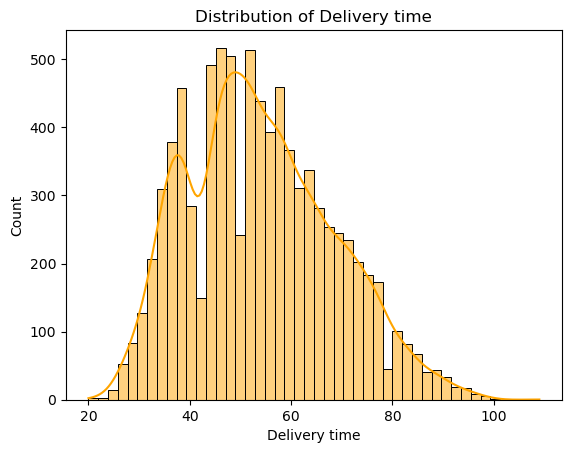

In [15]:
#Plot Distribution for Delivery time
sns.histplot(df['Delivery time'], kde = True , color = 'orange')
plt.title('Distribution of Delivery time')
plt.show()

Here, we can see that distribution is not normally distributed.

sns.histplot: Seaborn function to plot histograms

df(Delivery time): To specify the data to be plotted

kde=True: To show the Kernel Density Estimate (KDE) plot, which is a smoothed line that represents the distribution

Color='green': To set the color of the bars in the histogram to orange

plt.title: To add the title to the plot

plt.show(): To display the plot

Now, we check the toal order from each city and sort the data to see the highest ordeing city and least ordering city from Swiggy.

In [6]:
#Sorting the data
city_counts = df['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
city_counts = city_counts.sort_values(by='Count', ascending=False)
print(city_counts)

        City  Count
0    Kolkata   1346
1     Mumbai   1277
2    Chennai   1106
3       Pune   1090
4  Hyderabad   1075
5  Bangalore    946
6  Ahmedabad    717
7      Delhi    611
8      Surat    512


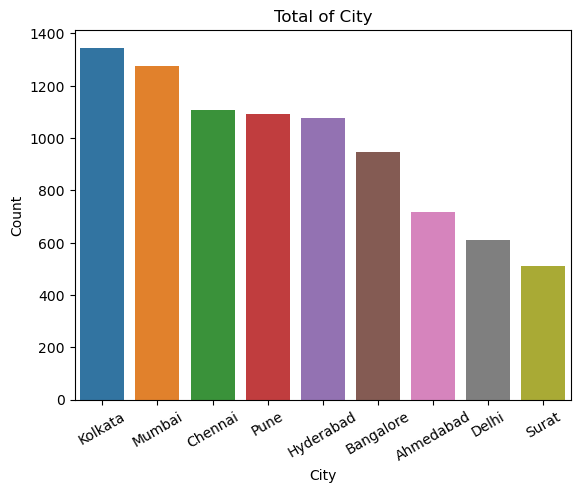

In [7]:
#Graphical Representation of City with count of order
sns.barplot(x = 'City', y = 'Count', data = city_counts)
plt.title('Total of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 30)
plt.show()

This Dataset shows that Kolkata is the highest food Ordering city from Swiggy where as Surat is the least food  Ordering city from Swiggy. 

#### Check correlation

Positive Correlation: If the correlation coefficient is positive, it indicates that as one variable increases, the other variable also tends to increase

Negative Correlation: If the correlation coefficient is negative, it indicates that as one variable increases, the other variable tends to decrease

Near Zero: A correlation coefficient close to zero indicates a weak or no linear relationship between the variables

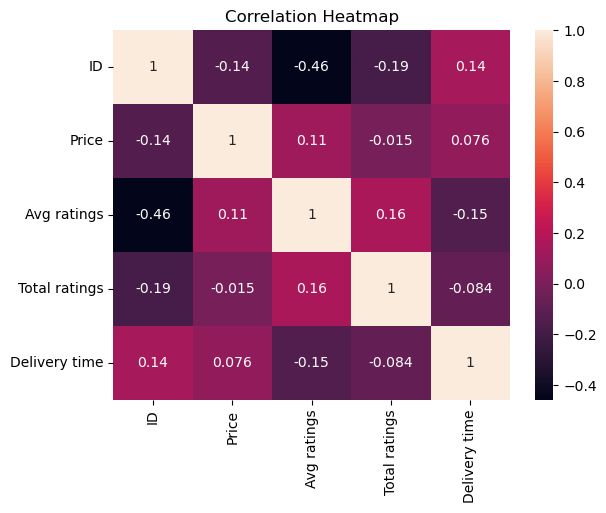

In [5]:
#Heatmap for correlation
sns.heatmap(df[['ID', 'Price', 'Avg ratings', 'Total ratings', 'Delivery time']].corr(),
            annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [14]:
#Top 5 food items with high rating and cheap price
top_5_food = df.sort_values(by= ['Avg ratings','Price'], ascending= [False, True]).head(5)
print(top_5_food)

          ID          Area       City               Restaurant  Price  \
8571  450543      Perambur    Chennai                   Afresh  100.0   
6538   13188  Shivajinagar       Pune  Shree Krishna Juice Bar  150.0   
5425  427282       Chembur     Mumbai       The Asian Pavilion  200.0   
5885  444623  Andheri East     Mumbai         Nivala Apka Apna  200.0   
8011  321807  Basavanagudi  Bangalore           Creams & Bites  200.0   

      Avg ratings  Total ratings                               Food type  \
8571          5.0             20  Healthy Food,Salads,Desserts,Beverages   
6538          5.0             20                        Juices,Beverages   
5425          5.0             20                          Asian  Chinese   
5885          5.0             20             North Indian,Chinese,Indian   
8011          5.0             20                               Ice Cream   

              Address  Delivery time  
8571         Perambur             50  
6538  Near Ghole Road     

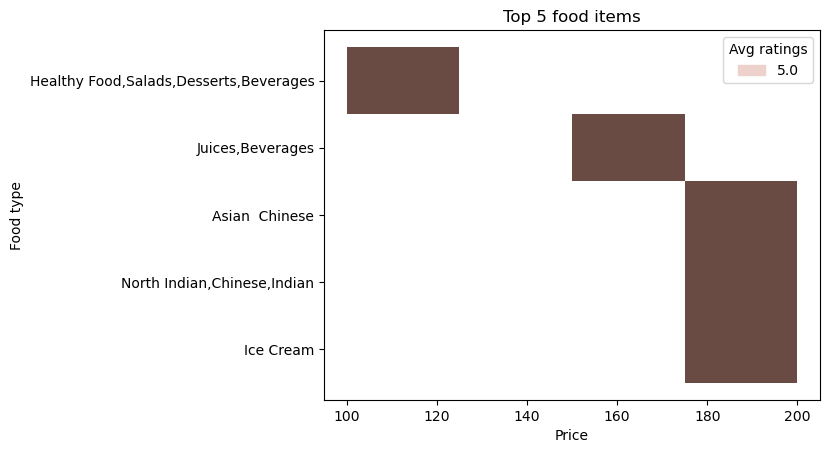

In [26]:
#Plot graph for Top 5 Food items
sns.histplot(y= 'Food type', x= 'Price',hue= 'Avg ratings',data = top_5_food)
plt.title('Top 5 food items')
plt.show()

In [25]:
#Top 5 expensive restaurant
top_5_Rest = df.sort_values(by= 'Price', ascending= False).head(5)
print(top_5_Rest)

          ID               Area       City  \
3079  306434           Mylapore    Chennai   
2934  294499      Vasanth Nagar  Bangalore   
4718  394904  Scruz Bandra East     Mumbai   
1377   72003          Saki Naka     Mumbai   
8485  439628       Brigade Road  Bangalore   

                                Restaurant   Price  Avg ratings  \
3079            Malgudi - The Savera Hotel  2500.0          4.1   
2934           Itc Windsor - Gourmet Couch  2500.0          4.5   
4718  Origami Japanese & Korean Restaurant  2500.0          4.4   
1377                    Cafe Delhi Heights  2000.0          2.9   
8485     Lubov Patisserie By Frozen Bottle  2000.0          2.9   

      Total ratings                                          Food type  \
3079             50                          North Indian,South Indian   
2934             20  North Indian,Mughlai,Biryani,Grill,Seafood,Keb...   
4718             20                           Japanese,Korean,Barbecue   
1377             80     

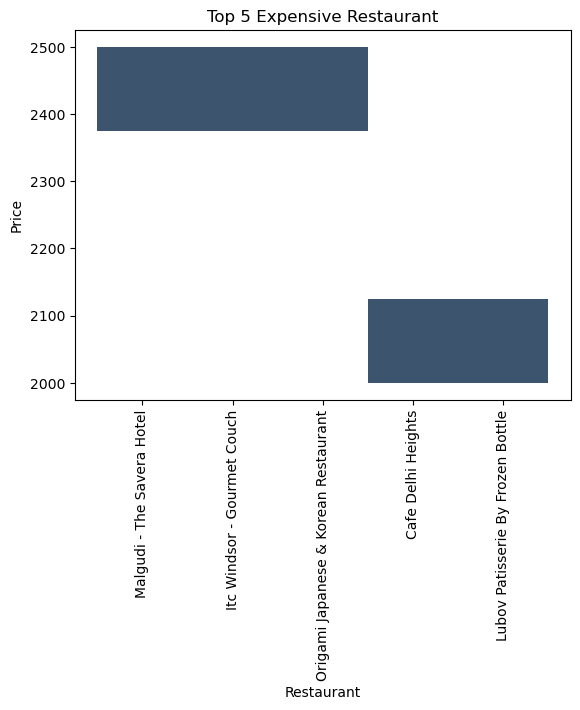

In [33]:
#Plot graph for Top 5 Expensive Restaurant
sns.histplot(x= 'Restaurant', y= 'Price',data = top_5_Rest)
plt.title('Top 5 Expensive Restaurant')
plt.xticks(rotation = 90)
plt.show()

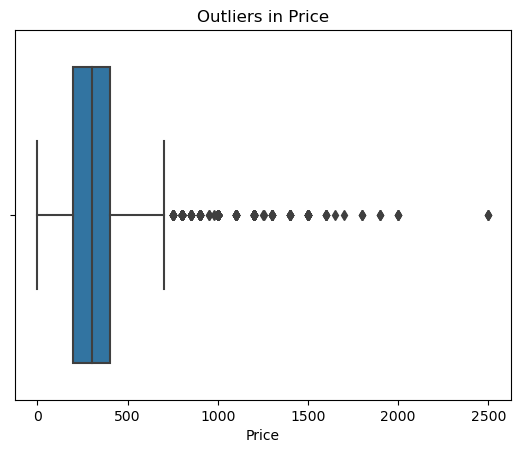

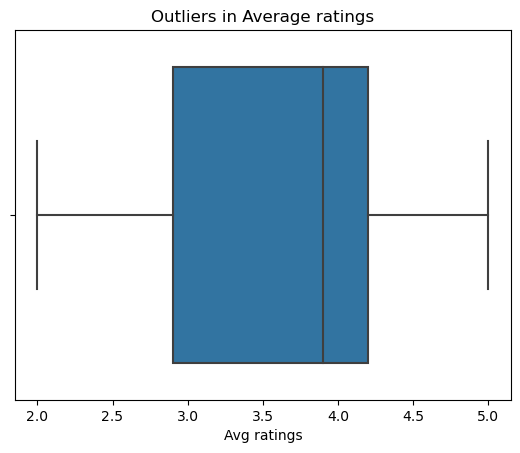

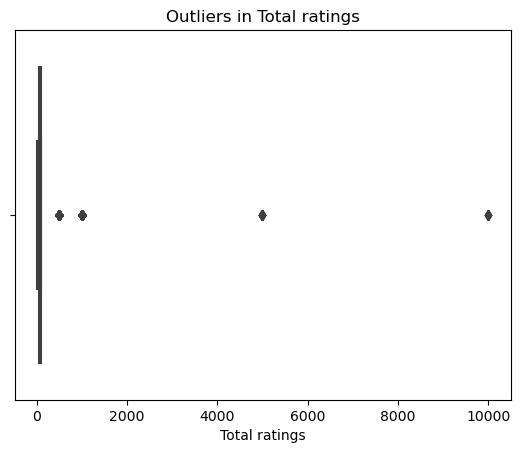

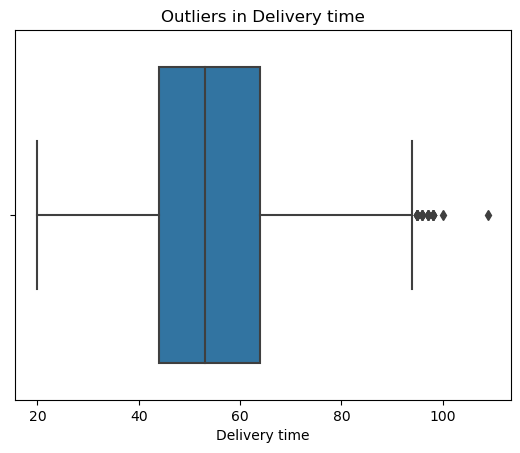

In [34]:
#Boxplot to find the outliers
sns.boxplot(x= 'Price', data = df)
plt.title('Outliers in Price')
plt.show()

sns.boxplot(x= 'Avg ratings', data = df)
plt.title('Outliers in Average ratings')
plt.show()

sns.boxplot(x= 'Total ratings', data = df)
plt.title('Outliers in Total ratings')
plt.show()

sns.boxplot(x= 'Delivery time', data = df)
plt.title('Outliers in Delivery time')
plt.show()

Here, only "Average Ratings" variables don't have any outliers. And rest 3 variables have outliers. Now, we will remove these outliers. 

In [46]:
# Removing outliers for Price

def remove_outlier(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_clean

df_cleaned = remove_outlier(df, 'Price')
df_cleaned = remove_outlier(df_cleaned, 'Price')

print(df_cleaned.info())   

<class 'pandas.core.frame.DataFrame'>
Index: 8097 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8097 non-null   int64  
 1   Area           8097 non-null   object 
 2   City           8097 non-null   object 
 3   Restaurant     8097 non-null   object 
 4   Price          8097 non-null   float64
 5   Avg ratings    8097 non-null   float64
 6   Total ratings  8097 non-null   int64  
 7   Food type      8097 non-null   object 
 8   Address        8097 non-null   object 
 9   Delivery time  8097 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 695.8+ KB
None


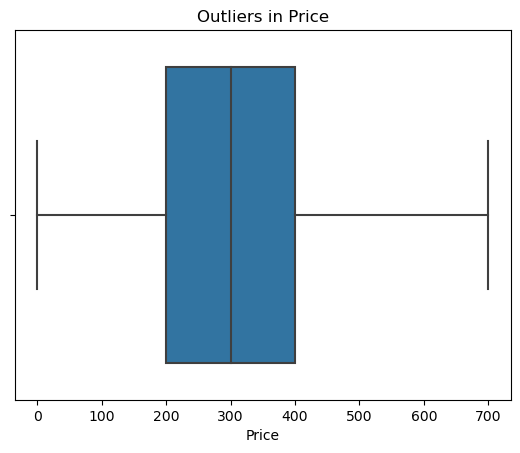

In [47]:
#Removed outliers boxplot for Price
sns.boxplot(x= 'Price', data = df_cleaned)
plt.title('Outliers in Price')
plt.show()

In [48]:
#Removing Outliers for Delivery time and Total ratings

def remove_outliers(df, column):
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_clean1 = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_clean1

df_cleaned1 = remove_outliers(df, 'Delivery time')
df_cleaned1 = remove_outliers(df_cleaned1, 'Delivery time')
df_cleaned1 = remove_outliers(df_cleaned1, 'Total ratings')


print(df_cleaned1.info())  

<class 'pandas.core.frame.DataFrame'>
Index: 7663 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             7663 non-null   int64  
 1   Area           7663 non-null   object 
 2   City           7663 non-null   object 
 3   Restaurant     7663 non-null   object 
 4   Price          7663 non-null   float64
 5   Avg ratings    7663 non-null   float64
 6   Total ratings  7663 non-null   int64  
 7   Food type      7663 non-null   object 
 8   Address        7663 non-null   object 
 9   Delivery time  7663 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 658.5+ KB
None


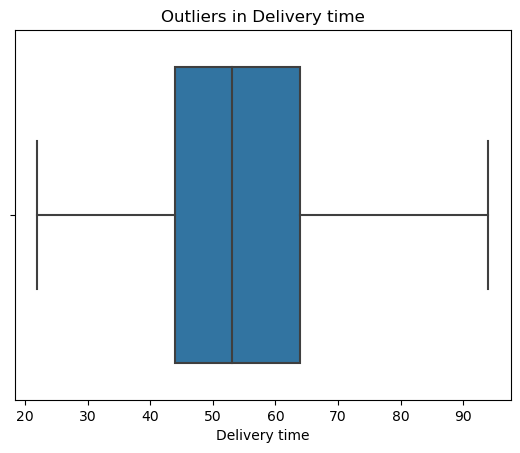

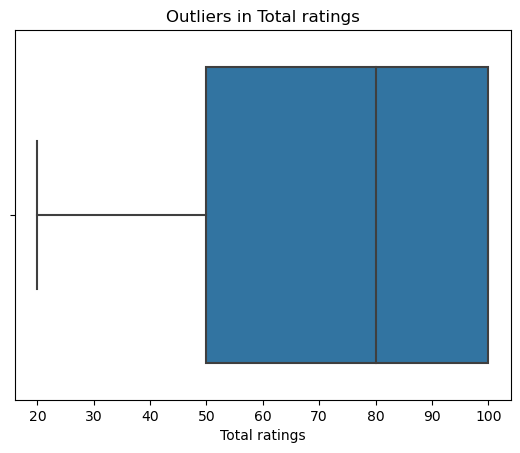

In [49]:
#Removed outliers boxplot for Delivery time
sns.boxplot(x= 'Delivery time', data = df_cleaned1)
plt.title('Outliers in Delivery time')
plt.show()

#Removed outliers boxplot for Total Ratings
sns.boxplot(x= 'Total ratings', data = df_cleaned1)
plt.title('Outliers in Total ratings')
plt.show()

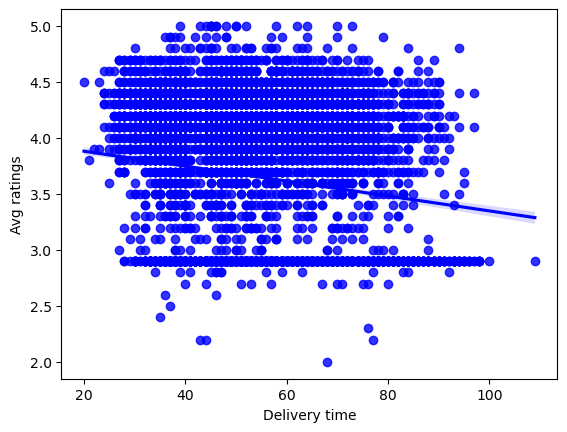

In [64]:
#Plot regplot graph to find relationship between delivery time and Average ratings
sns.regplot(x= 'Delivery time', y= 'Avg ratings', data =df, color = 'blue')
plt.title('Relation between Delivery time and Average Rating')
plt.show()

This dataset shows the effect of Average ratings due to delivery time. The more delivery time, the low is the rating. But also there are low ratig for less delivery time which can be due to other factors like food quality. 